# 15.077: Problem Set 1 

Alex Berke (aberke)

In [89]:
%config Completer.use_jedi = False # autocomplete

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 7.28: 
In surveys, it is difficult to obtain accurate answers to sensitive questions such as ”Have you ever used heroin?” or ”Have you ever cheated on an exam?” Warner (1965) introduced the method of randomized response to deal with such situations. A respondent spins an arrow on a wheel or draws a ball from an urn containing balls of two colors to determine which of two statements to respond to: (1) ”I have characteristic A,” or (2) ”I do not have characteristic A.” The interviewer does not know which statement is being responded to but merely records a yes or a no. The hope is that an interviewee is more likely to answer truthfully if he or she realizes that the interviewer does not know which statement is being responded to. 

-  Let R be the proportion of a sample answering Yes. 
- Let p be the probability that statement 1 is responded to (p is known from the structure of the randomizing device),
- Let q be the proportion of the population that has characteristic A. 
- Let r be the probability that a respondent answers Yes. 


### a. 
Show that r = (2p − 1)q + (1 − p). 

[Hint: P(yes) = P( yes given question 1) × P( question 1) + P(yes given question 2) × P(question 2).] 

Answer:

Let
- (A) : "respondent has A"
- (notA) : "respondent does not have  A"

P(YES) = P(YES given A) x P(given 1) + P(YES given notA) x P(YES given 2)

= q x p + (1-q) x (1-p)

= pq + 1 - q - p + pq

= 2pq - q +  1  - p

= (2p - 1)q + (1  - p)

### b
If r were known, how could q be determined? 

r and p are both known. By rearranging the terms we can then solve for q.

r = (2p − 1)q + (1 − p)

r - (1 − p) = (2p − 1)q 

r + p - 1 = (2p − 1)q

r + p - 1/ (2p − 1) = q 

###  c.
Show that E(R) = r, and propose an estimate, Q, for q. Show that the estimate is unbiased.

For each respondent, xi, if respondent answered Yes, then xi=1; otherwise if the respondent answered No then xi = 0.

r is then the population mean. 

E(R) = r then follows from Lemma A in chapter 7.3.

q is the proportion of the population that has characteristic A. 

Q is then the proportion of the sample that has characteristic A.

A similar result follows:

E(Q) = q.

These estimates  are unbiased because  they use  the  true known population parameters, p and q.

### d. 
Ignoring the finite population correction, show that 

Var(R) = r(1 − r) / n 

where n is the sample size. 

The population variance var(r) is defined for the dichotomous case by Rice (section 7.2) as p(1-p).

Ignoring  the finite population correction, can correct this for the sample value (R) by dividing by the sample size, n.


###  e.
Find an expression for Var(Q). 

q(1-q) / n

This is shown similarly to d.

## 7.64: 
The value of an inventory is to be estimated by sampling. The items are stratified by book value in the following way:


In [43]:
inventory = pd.DataFrame({
    'stratum': ['$1000+', '$200 − 1000', '$1 − 200'],
    '$N_l$': [70,500,10000],
    '$\mu_l$': [3000,500,90],
    '$\sigma_l$': [1250, 100,30],
}).set_index('stratum')
inventory

,$N_l$,$\mu_l$,$\sigma_l$
stratum,,,
$1000+,70,3000,1250
$200 − 1000,500,500,100
$1 − 200,10000,90,30


### a. 
What should the relative sampling fraction in each stratum be for proportional and for optimal allocation? Ignore the finite population correction. 

In [45]:
n = inventory['$N_l$'].sum()
print('n = %s' % n)
# add in sampling fraction, W
inventory['$W_l$'] = inventory['$N_l$']/n
inventory

n = 10570


,$N_l$,$\mu_l$,$\sigma_l$,$W_l$
stratum,,,,
$1000+,70,3000,1250,0.006623
$200 − 1000,500,500,100,0.047304
$1 − 200,10000,90,30,0.946074


In [49]:
# proportional allocation
# n_l / n = W_l
print('for proportional allocation, the relative sampling fractions should be the following:')
inventory['$W_l$'].to_frame()

for proportional allocation, the relative sampling fractions should be the following:


,$W_l$
stratum,
$1000+,0.006623
$200 − 1000,0.047304
$1 − 200,0.946074


In [56]:
# optimal allocation
# n_l / n = [W_l * sigma_l] / SUM (W_k * sigma_k)

denominator = (inventory['$W_l$']*inventory['$\sigma_l$']).sum()
so = (inventory['$W_l$'] * inventory['$\sigma_l$'])/denominator
print('relative sampling fraction for optimal allocation is the following:')
so.rename('sampling fraction').to_frame()

relative sampling fraction for optimal allocation is the following:


,sampling fraction
stratum,
$1000+,0.200000
$200 − 1000,0.114286
$1 − 200,0.685714



### b. 
How do the variances under each type of allocation compare to each other and to the variance under simple random sampling?

In [62]:
# comparing each type of allocation:
# first we compute σ_bar

sigma_bar = (inventory['$W_l$']*inventory['$\sigma_l$']).sum()
print('𝜎_bar = %s' % sigma_bar)

𝜎_bar = 41.390728476821195


We can compare Var(Xsp) and Var(Xso)

where  Xsp is the sample mean from proportion allocaiton and Xso is from optimal allocation.

Computing

Var(Xsp) − Var(Xso) = 1/n x SUM( Wl x (σ_l−σ_bar)^2 )

In [79]:
diff = (1/n) * (inventory['$W_l$'] * ((inventory['$\sigma_l$'] - sigma_bar)**2)).sum()
print('= %s' % diff)

= 0.9421942314684617


using example B from Rice (p 236) as reference:

We compute Var(Xsp) / Var(Xso)

Var(Xsp) / Var(Xso)  = 1 + SUM( W_l x (σ_l - σ_bar)^2 )  / ( SUM(Wl x σ_l) )^2



In [80]:
# computing  the numerator on right hand  side

numerator = (inventory['$W_l$']*((inventory['$\sigma_l$'] - sigma_bar)**2)).sum()
print('numerator = %s' % numerator)
denominator = ((inventory['$W_l$']*inventory['$\sigma_l$']).sum())**2
print('denominator = %s' % denominator)

print('1 + %s = %s' % (numerator/denominator, 1 + numerator/denominator))

numerator = 9958.99302662164
denominator = 1713.192403841937
1 + 5.81312 = 6.81312


It seems  that under proportional allocation, the variance of the mean could  be about 580% larger than under optimal allocation.

Comparing the  variance of the mean under simple random sampling (Xsrs) to other allocation methods:



Var (Xsrs) / Var(Xsp) = 1 + SUM (W_l x (μ_l - μ_bar)^2

In [82]:
# first compute μ_bar
u_bar = (1/n) * (inventory['$N_l$']*inventory['$\mu_l$']).sum()
print('μ_bar = %s' % u_bar)

μ_bar = 128.66603595080417


In [83]:
numerator = (inventory['$W_l$'] * (inventory['$\mu_l$'] - u_bar)**2).sum()
print('numerator = %s' % numerator)
denominator = (inventory['$W_l$']*(inventory['$\sigma_l$'])**2).sum()
print('denominator = %s' % denominator)
print('1 + %s = %s' %  (numerator/denominator, 1+ numerator/denominator))

numerator = 62536.8203507007
denominator = 11672.185430463576
1 + 5.357764466925279 = 6.357764466925279


Variance  about the mean for simple random sampling is  about 540% greater than for proportional allocation.

Comparing simple  random sampling to optimal allocation:

We can use

Var (Xsrs) / Var (Xso) = (Var (Xsrs) / Var(Xsp)) x (Var(Xsp) / Var(Xso))

Where the right hand side values  were previously  computed.

i.e.

Var (Xsrs) / Var (Xso) = 6.357764466925279 x 6.81312

In [84]:
6.357764466925279 * 6.81312

43.316212244897955

The variance of the mean for simple random sampling  is about 4332% greater than for optimal allocation.

## 8.44: 

The file bodytemp contains normal body temperature readings (degrees Fahrenheit) and heart rates (beats per minute) of 65 males (coded by 1) and 65 females (coded by 2) from Shoemaker (1996). Assuming that the population distributions are normal (an assumption that will be investigated in a later chapter), estimate the means and standard deviations of the males and females. Form 95% confidence intervals for the means. 

Standard folklore is that the average body temperature is 98.6 degrees Fahrenheit. Does this appear to be the case?

In [7]:
bodytemp = pd.read_csv('bodytemp.txt')
bodytemp.head()

,temperature,gender,rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [23]:
males = bodytemp[bodytemp['gender']==1]
females = bodytemp[bodytemp['gender']==2]

n_males = len(males)
n_females = len(females)
print('males: n = %s' % n_males)
print('females: n = %s' % n_females)

males: n = 65
females: n = 65


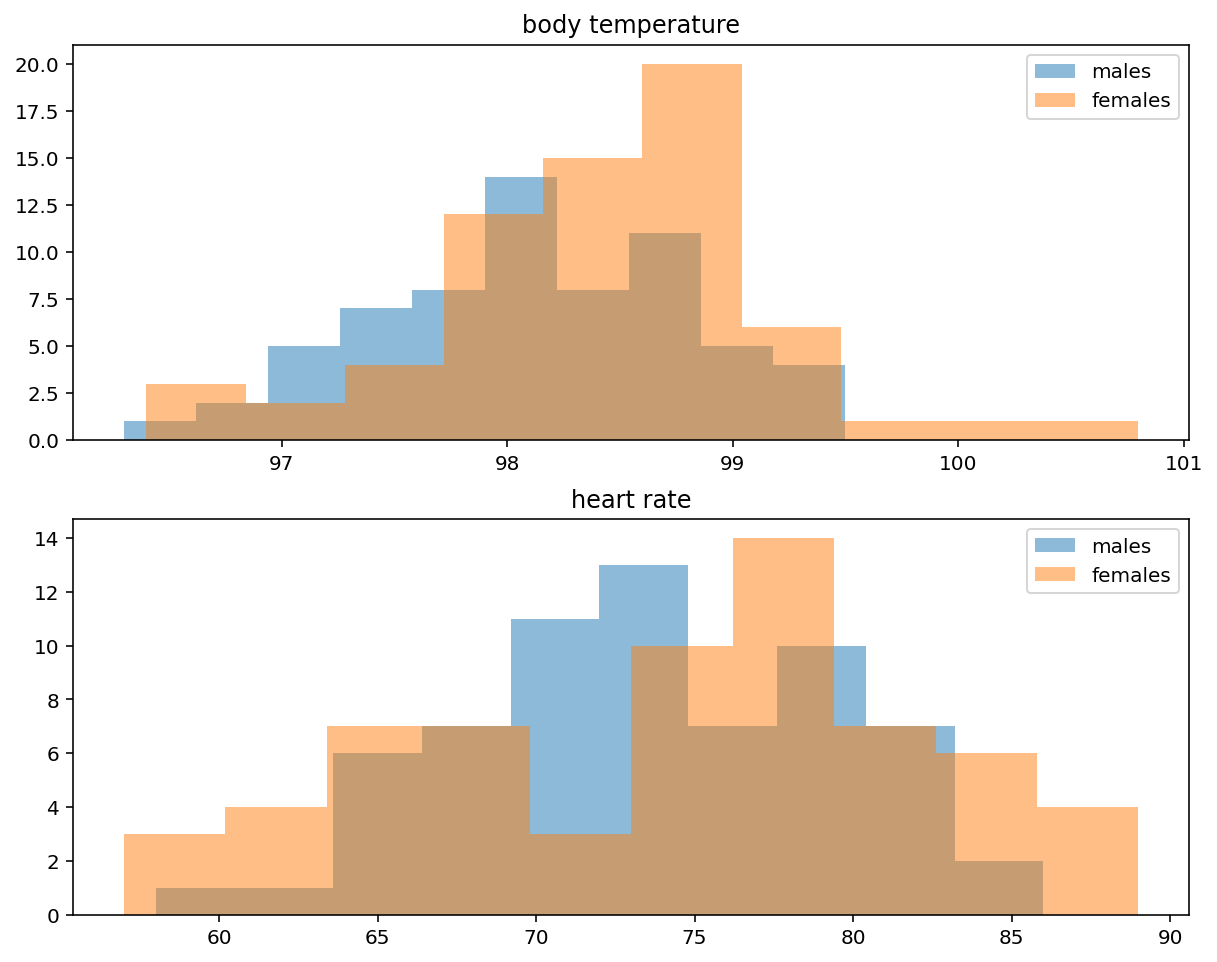

In [25]:
fig, ax = plt.subplots(2, figsize=(10, 8))
temp_ax = ax[0]
rate_ax = ax[1]

temp_ax.hist(males['temperature'], label='males', alpha=0.5)
temp_ax.hist(females['temperature'], label='females', alpha=0.5)
temp_ax.set_title('body temperature')
temp_ax.legend()

rate_ax.hist(males['rate'], label='males', alpha=0.5)
rate_ax.hist(females['rate'], label='females', alpha=0.5)
rate_ax.set_title('heart rate')
rate_ax.legend()

The following  are estimates of the means and standard deviations for males and females, temperature and heart rate.

In [93]:
mean_temp_males = (1/n_males)*males['temperature'].sum()
mean_temp_females = (1/n_females)*females['temperature'].sum()
std_temp_males = np.sqrt((1/n_males)*((males['temperature'] - mean_temp_males)**2).sum())
std_temp_females = np.sqrt((1/n_females)*((females['temperature'] - mean_temp_females)**2).sum())

mean_hrate_males = (1/n_males)*males['rate'].sum()
mean_hrate_females = (1/n_males)*females['rate'].sum()
std_hrate_males = np.sqrt((1/n_males)*((males['rate'] - mean_hrate_males)**2).sum())
std_hrate_females = np.sqrt((1/n_females)*((males['rate'] - mean_hrate_females)**2).sum())


print('mean temperature for males = %s' % mean_temp_males)
print('standard deviation for males temperature = %s' % std_temp_males)
print('mean temperature for females = %s' % mean_temp_females)
print('standard deviation for females temperature = %s' % std_temp_females)
print('mean heart rate for males = %s' % mean_hrate_males)
print('standard deviation for males heart rate = %s' % std_hrate_males)
print('mean heart rate for females = %s' % mean_hrate_females)
print('standard deviation for females heart rate = %s' % std_hrate_females)


mean temperature for males = 98.1046153846154
standard deviation for males temperature = 0.6933598841828699
mean temperature for females = 98.39384615384616
standard deviation for females temperature = 0.7377464486428966
mean heart rate for males = 73.36923076923077
standard deviation for males heart rate = 5.829815225384951
mean heart rate for females = 74.15384615384616
standard deviation for females heart rate = 5.882377653968278


To form 95% confidence intervals we might  use a t distribution given that the true population parameters are unknown.

The degrees of freedom are 65-1=64.  i.e. closest to 60 in Rice's t distribution table. The corresponding alpha value is 1.671.

Rice  also notes  that for more than 20 or  30 degrees of freedom, the  standard normal distribution and t distributions are very  close, for which case a standard normal distribution can be used.

For this  reason, I  will use standard normal distribution values.
i.e. 1.96.

Note we will ignore the finite   population  correction and estimate the standard   error about the  mean  as 

s_bar = s  / sqrt(n)

where s is the previous  computed standard deviation. This is the estimated population  standard deviation in terms of the  sample  data.

In [102]:
# 95% CI for temp

print('95% confidence interval for males average temperature')
mt_ci_low = mean_temp_males - 1.96*(std_temp_males/np.sqrt(n_males))
mt_ci_high = mean_temp_males + 1.96*(std_temp_males/np.sqrt(n_males))
print('[%s, %s]' % (round(mt_ci_low, 2), round(mt_ci_high, 2)))

print('95% confidence  interval for females average temperature')
ft_ci_low = mean_temp_females - 1.96*(std_temp_females/np.sqrt(n_females))
ft_ci_high = mean_temp_females + 1.96*(std_temp_males/np.sqrt(n_females))
print('[%s, %s]' % (round(ft_ci_low, 2), round(ft_ci_high, 2)))

# 95% CI for heart rate

print('95% confidence  interval for males average heart rate')
mhr_ci_low = mean_hrate_males - 1.96*(std_hrate_males/np.sqrt(n_males))
mhr_ci_high = mean_hrate_males + 1.96*(std_hrate_males/np.sqrt(n_males))
print('[%s, %s]' % (round(mhr_ci_low, 2), round(mhr_ci_high, 2)))

print('95% confidence  interval for females average heart rate')
fhr_ci_low = mean_hrate_females - 1.96*(std_hrate_females/np.sqrt(n_females))
fhr_ci_high = mean_hrate_females + 1.96*(std_hrate_females/np.sqrt(n_females))
print('[%s, %s]' % (round(fhr_ci_low, 2), round(fhr_ci_high, 2)))

95% confidence  interval for males average temperature
[97.94, 98.27]
95% confidence  interval for females average temperature
[98.21, 98.56]
95% confidence  interval for males average heart rate
[71.95, 74.79]
95% confidence  interval for females average heart rate
[72.72, 75.58]


Standard folklore is that the average body temperature is 98.6 degrees Fahrenheit.

Our males and females samples both have 95% confidence intervals slightly below this value. However, when rounding, the upper limit of the female 95% CI is 98.6.

However, we can also look at the mean body  temperature across all samples,  without  stratifying by males vs females.

In [105]:
n = len(bodytemp)
print('n = %s' %  n)
mean_temp = (1/n)*bodytemp['temperature'].sum()
std_temp = np.sqrt((1/n)*((bodytemp['temperature'] - mean_temp)**2).sum())

print('sample mean temperature = %s' % mean_temp)
print('sample standard deviation temperature = %s' % std_temp)

print('95% confidence  interval for average temperature (all samples)')
t_ci_low = mean_temp - 1.96*(std_temp/np.sqrt(n))
t_ci_high = mean_temp + 1.96*(std_temp/np.sqrt(n))
print('[%s, %s]' % (round(t_ci_low, 2), round(t_ci_high, 2)))

n = 130
sample mean temperature = 98.24923076923079
sample standard deviation temperature = 0.730357778905038
95% confidence  interval for average temperature (all samples)
[98.12, 98.37]


Our sample's 95% confidence interval still does not overlap with folklore.